# Violation of Baccari et al.'s Bell inequality for path graphs from size 2 to 57 on IBM Quantum kawasaki

In [1]:
import sys
import time
import numpy as np
import pickle

In [2]:
max_size = 21
max_length = 20

In [3]:
with open("./pkls/raw_hist_list.pkl", "rb") as f:
    raw_hist_list = pickle.load(f)
# with open("./pkls/ignis_hist_list.pkl", "rb") as f:
#     ignis_hist_list = pickle.load(f)
# with open("./pkls/delta_hist_list.pkl", "rb") as f:
#     delta_hist_list = pickle.load(f)
with open("./pkls/lnp_hist_list.pkl", "rb") as f:
    lnp_hist_list = pickle.load(f)
# with open("./pkls/mooney01_hist_list.pkl", "rb") as f:
#     mooney01_hist_list = pickle.load(f)
# with open("./pkls/nation_hist_list.pkl", "rb") as f:
#     nation_hist_list = pickle.load(f)

In [4]:
sys.path.append("../../libs_bell/")
from lib_graph_states import adjacency_list_for_path_graph, list_to_matrix
F_list = [3 * i + 1 for i in range(max_size // 3)] # subset of focused vertices of graph size max_size
Fs = [F_list[:(n+1) // 3] for n in range(1, max_size + 1)] # subsets of focused vertices of graph size 1 to max_size
adj_lists = [adjacency_list_for_path_graph(n) for n in range(1, max_size + 1)] # adjacency list of graph size 1 to max_size
graphs = [list_to_matrix(adj_list) for adj_list in adj_lists] # adjacency matrix of graph size 1 to max_size
print("max_size:", max_size)
print("F_list:", F_list)

max_size: 21
F_list: [1, 4, 7, 10, 13, 16, 19]


In [5]:
from lib_path_graphs import correlations_of_path_graphs

In [6]:
corr_list, stddev_list, Es_list, Ds_list = correlations_of_path_graphs(adj_lists, Fs, raw_hist_list)

graph size: 1
skipped

graph size: 2
total correlation: 2.6968804042227164 

graph size: 3
total correlation: 5.252891879380925 

graph size: 4
total correlation: 6.187849346772924 

graph size: 5
total correlation: 7.95218915248465 

graph size: 6
total correlation: 10.47816240012175 

graph size: 7
total correlation: 11.206793225946004 

graph size: 8
total correlation: 12.93715385305661 

graph size: 9
total correlation: 15.372667151147384 

graph size: 10
total correlation: 16.46063713045794 

graph size: 11
total correlation: 18.035366124052977 

graph size: 12
total correlation: 20.64282237967837 

graph size: 13
total correlation: 21.602091550147456 

graph size: 14
total correlation: 23.3424649197651 

graph size: 15
total correlation: 25.751047393181775 

graph size: 16
total correlation: 26.928898078141675 

graph size: 17
total correlation: 28.600881070874042 

graph size: 18
total correlation: 31.10372143065006 

graph size: 19
total correlation: 32.07910983613321 

graph s

In [7]:
# ignis_corr_list, ignis_stddev_list, ignis_Es_list, ignis_Ds_list = correlations_of_path_graphs(adj_lists, Fs, ignis_hist_list)

In [8]:
# delta_corr_list, delta_stddev_list, delta_Es_list, delta_Ds_list = correlations_of_path_graphs(adj_lists, Fs, delta_hist_list)

In [9]:
lnp_corr_list, lnp_stddev_list, lnp_Es_list, lnp_Ds_list = correlations_of_path_graphs(adj_lists, Fs, lnp_hist_list)

graph size: 1
skipped

graph size: 2
total correlation: 2.8284271247461903 

graph size: 3
total correlation: 5.613383782340554 

graph size: 4
total correlation: 6.480450800620259 

graph size: 5
total correlation: 8.368853428496521 

graph size: 6
total correlation: 11.21672088503672 

graph size: 7
total correlation: 11.89407422437644 

graph size: 8
total correlation: 13.732454140685851 

graph size: 9
total correlation: 16.435693816762967 

graph size: 10
total correlation: 17.496580524232957 

graph size: 11
total correlation: 19.096262887623354 

graph size: 12
total correlation: 21.9464308853442 

graph size: 13
total correlation: 22.854657249716155 

graph size: 14
total correlation: 24.500599781386974 

graph size: 15
total correlation: 27.16575188361842 

graph size: 16
total correlation: 28.283962157483668 

graph size: 17
total correlation: 29.86973145769102 

graph size: 18
total correlation: 32.40385431700234 

graph size: 19
total correlation: 33.20179117209169 

graph 

In [10]:
# mooney01_corr_list, mooney01_stddev_list, mooney01_Es_list, mooney01_Ds_list = correlations_of_path_graphs(adj_lists, Fs, mooney01_hist_list)

In [11]:
# nation_corr_list, nation_stddev_list, nation_Es_list, nation_Ds_list = correlations_of_path_graphs(adj_lists, Fs, nation_hist_list)

## plot correlations

In [12]:
c_bounds = [0] + [n + (n // 3) for n in range(2, max_size + 1)]
q_bounds = [0]
for n in range(2, max_size + 1):
    q_bounds.append( 2 * (np.sqrt(2) * 2 - 1) * (n // 3) + n - ((n + 1) // 3))
    if (n + 1) % 3 == 0:
        q_bounds[-1] += (np.sqrt(2) * 2 - 1)

In [13]:
from lib_plots import plot_correlations_lines, cut_corrs_list

In [14]:
corrs_list = [np.array(corr_list), 
              # np.array(ignis_corr_list),
              # np.array(delta_corr_list),
              np.array(lnp_corr_list),
              # np.array(mooney01_corr_list),
              # np.array(nation_corr_list),
             ]
stddevs_list = [np.array(stddev_list),
                # np.array(ignis_stddev_list),
                # np.array(delta_stddev_list),
                np.array(lnp_stddev_list),
                # np.array(mooney01_stddev_list),
                # np.array(nation_stddev_list),
               ]

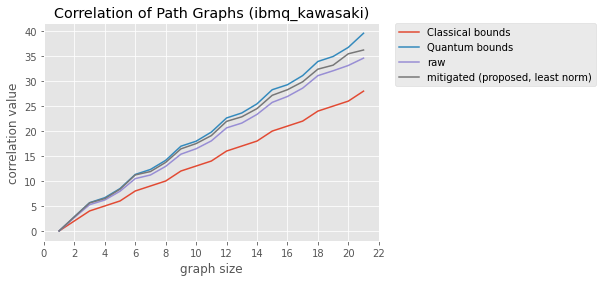

In [15]:
plot_correlations_lines(max_size, 
                        c_bounds, 
                        q_bounds, 
                        corrs_list,
                        stddevs_list,
                        ["raw", 
                         # "mitigated (ignis)", 
                         # "mitigated (proposed, delta)", 
                         "mitigated (proposed, least norm)", 
                         # "mitigated (Mooney et al., threshold = 0.1)",
                         # "mitigated (Nation et al., iterative)",
                        ], 
                        # ["*", "*", "*", "*", "*", "*"], 
                        "Correlation of Path Graphs (ibmq_kawasaki)")

In [16]:
with open("./pkls/corrs_stddevs_list.pkl", "wb") as f:
    pickle.dump([corrs_list, stddevs_list], f)